In [1]:
import pandas as pd
# important libraries that are used for data manipulation and visulization
import seaborn as sns
# Seaborn library provides a high quality graphs which are used to plot
import matplotlib.pyplot as plt
# Provides support to plotting tools which are used for data visualization


In [2]:
df=pd.read_csv('News.csv')
# reading the data set file
df.head()
# printing the top 5 rows of the data set which are used for getting a glance


,Unnamed: 0,title,text,subject,date,class
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [3]:
df.shape
# shape is used to print the number of rows and columns in the dataset
# i.e total of 44919 rows and 6 columns

(44919, 6)

In [4]:
df.columns
# All the named columns are known

Index(['Unnamed: 0', 'title', 'text', 'subject', 'date', 'class'], dtype='object')

In [5]:
df.info()
# used to get information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44919 non-null  int64 
 1   title       44919 non-null  object
 2   text        44919 non-null  object
 3   subject     44898 non-null  object
 4   date        44898 non-null  object
 5   class       44919 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


In [6]:
df.isnull().sum()
#isnull is used to determine the null values within the file
#  sum is used to get the  total the number of null values that are in each columns

Unnamed: 0     0
title          0
text           0
subject       21
date          21
class          0
dtype: int64

In [7]:
# Since we know that title subject and date are not going to detect in order to detect the fake news
df=df.drop(['title','subject','date','Unnamed: 0'],axis=1)
print(df)


                                                    text  class
0      Donald Trump just couldn t wish all Americans ...      0
1      House Intelligence Committee Chairman Devin Nu...      0
2      On Friday, it was revealed that former Milwauk...      0
3      On Christmas day, Donald Trump announced that ...      0
4      Pope Francis used his annual Christmas Day mes...      0
...                                                  ...    ...
44914  BRUSSELS (Reuters) - NATO allies on Tuesday we...      1
44915  LONDON (Reuters) - LexisNexis, a provider of l...      1
44916  MINSK (Reuters) - In the shadow of disused Sov...      1
44917  MOSCOW (Reuters) - Vatican Secretary of State ...      1
44918  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...      1

[44919 rows x 2 columns]


In [8]:
df.isnull().sum()

text     0
class    0
dtype: int64

<Axes: xlabel='class', ylabel='count'>

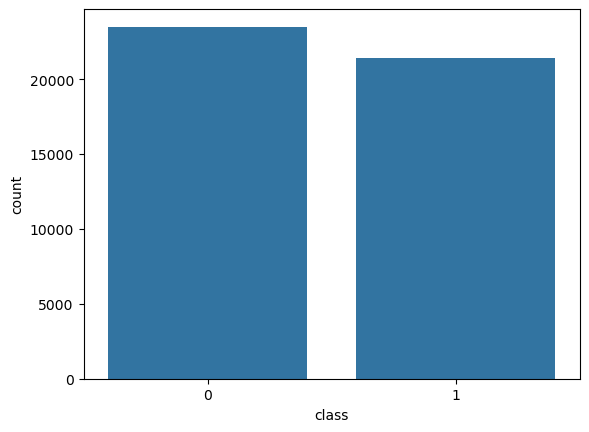

In [9]:
sns.countplot(data=df,x='class')
# plotting a countplot

In [11]:
from tqdm import tqdm

In [13]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [32]:
from tqdm import tqdm
# provides a fast extensible progress bar for loops and other operations
import re
# (reguar expression) library which is used for string pattern matching and manipulation
import nltk
# imports the natural language toolkit, a leading platform for building python programs to work with human language data 
nltk.download('punkt')
# punkt is used 
# splitting text into sentences and words
nltk.download('stopwords')
# Downloads a lists of common stop words in various languages
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# used for split text into words
from nltk.stem.porter import PorterStemmer
# used for reducing words to thier forms
from wordcloud import WordCloud
# library used to generate world cloud visualizations.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\binuk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\binuk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
# def preprocess_text(text_data):
# # creating a function named preprocess_text
#     preprocessed_text=[]
#     # creating an empty list

#     for sentence in tqdm(text_data):
# # itrates through every text that are feeded
#         sentence = re.sub(r'[^\w\s]','',sentence)
# #Every thing other then aplhanumeric and spaces are removed  
#         preprocessed_text.append(''.join(token.lower()
#            # CONVERTING TOKEN INTO LOWER CASE
#                                     for token in str(sentence).split()
#                # SPILITTING THE TEXT INTO WORDS
#                                      if token not in stopwords.words('english')))
#     return preprocessed_text

In [58]:
def preprocess_text(text_data):
    preprocessed_text = []
    
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text


In [60]:
preprocessed_review=preprocess_text(df['text'].values)
df['text']=preprocessed_review

100%|██████████████████████████████████████████████████████████████████████████| 44919/44919 [00:07<00:00, 5773.23it/s]


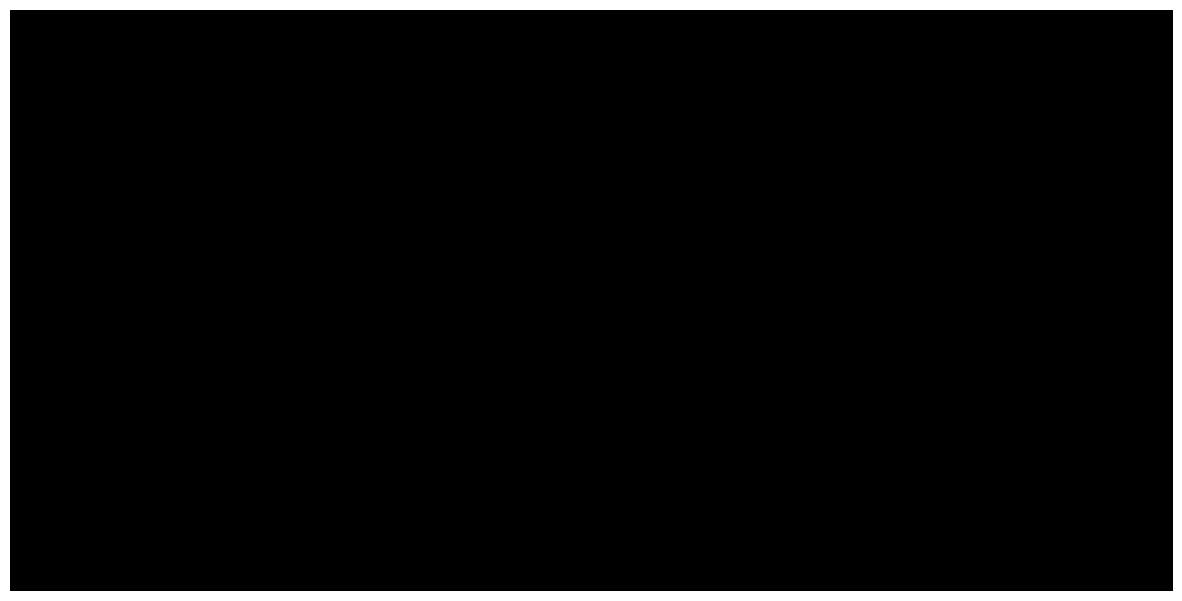

In [62]:
# Real
consolidated = ' '.join(
    word for word in df['text'][df['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


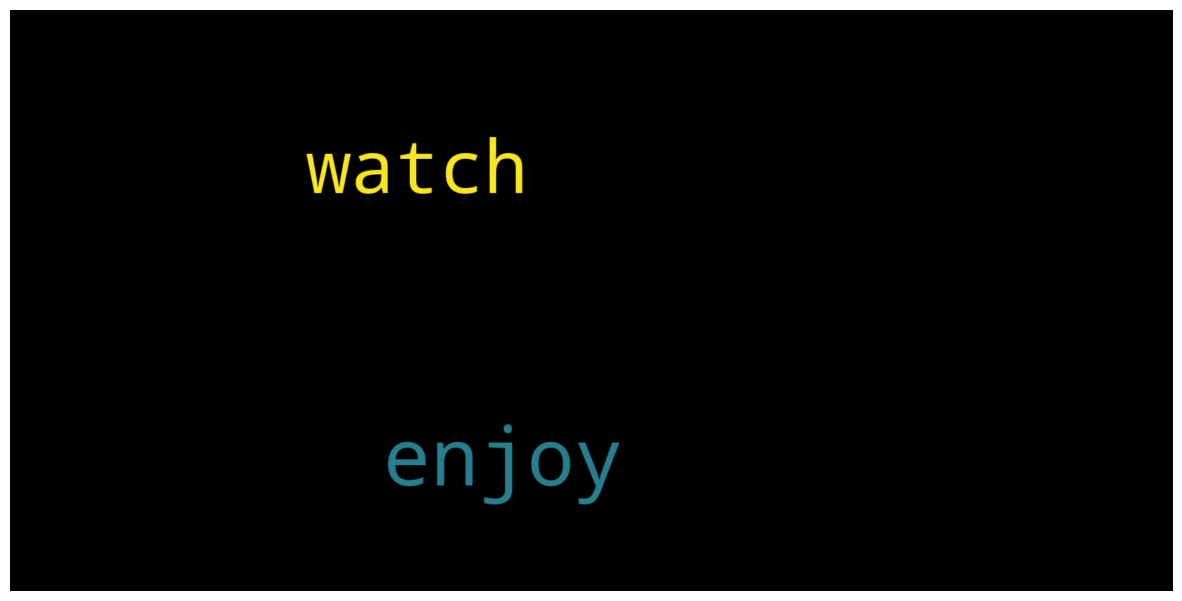

In [52]:
# Fake
consolidated = ' '.join(
    word for word in df['text'][df['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


In [64]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)


<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

Error in callback <function _draw_all_if_interactive at 0x00000253AA620860> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: In draw_glyphs_to_bitmap: Could not convert glyph to bitmap (raster overflow; error code 0x62)

RuntimeError: In draw_glyphs_to_bitmap: Could not convert glyph to bitmap (raster overflow; error code 0x62)

<Figure size 1000x600 with 1 Axes>